# Predict Salary

## Importing the Python libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from sklearn import metrics

from sklearn.preprocessing import LabelEncoder

import os

import math

%matplotlib inline

## Dataset
### Set raw data file path
### Reading the data sheet

In [2]:
raw_file_path = os.path.join(os.path.pardir, 'data', 'raw')
raw_data_file_path = os.path.join(raw_file_path, 'salary_data_1.xlsx')

raw_data = pd.read_excel(raw_data_file_path)

## Explore Data
### Get a sneak peak

In [3]:
raw_data.head(10)

,Age,Industry,Generic Job Title,Salary,Currency,Experience,Gender
0,18-24,Hospital,Medical Laboratory Technologist,1000.0,USD,1,Male
1,18-24,on-campus employment,Borrow Direct Assistant,2000.0,USD,1,Male
2,18-24,Images and Data Entry,Seasonal data entry associate,2000.0,USD,1,Male
3,35-44,Retail Gocery,Superviso,2240.0,USD,11,Male
4,18-24,"Currently a student, but I work in my drama de...",Theatrical Journeyman/student,2900.0,USD,1,Male
5,18-24,County govt,Intern,3000.0,USD,1,Male
6,18-24,Software,Software developer,3000.0,USD,4,Male
7,55-64,Grocery,Front end cashier,3150.0,USD,11,Male
8,25-34,Academia,Adjunct,3500.0,USD,6,Male
9,55-64,graphic designer,graphic designer,3500.0,USD,22,Male


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 877 entries, 0 to 876
Data columns (total 7 columns):
Age                  877 non-null object
Industry             841 non-null object
Generic Job Title    877 non-null object
Salary               877 non-null float64
Currency             877 non-null object
Experience           877 non-null int64
Gender               877 non-null object
dtypes: float64(1), int64(1), object(5)
memory usage: 48.0+ KB


In [5]:
print(raw_data['Generic Job Title'])

0                Medical Laboratory Technologist
1                        Borrow Direct Assistant
2                  Seasonal data entry associate
3                                      Superviso
4                  Theatrical Journeyman/student
5                                         Intern
6                             Software developer
7                              Front end cashier
8                                        Adjunct
9                               graphic designer
10                            Research Assistant
11              Collection Development Librarian
12                              Office Assistant
13                                  Receptionist
14                                    Line cook 
15                      Study start-up associate
16                      Study start-up associate
17                              Prison Librarian
18                                     Paralegal
19                            Teachers Assistant
20                  

### Generalising the job titles into categories

In [6]:
def GetJobTitle(jobtitle):
    engineer = ["engineer", "analyst", "animator", "data scientist","technician", "engineering", "qa", "quality","tech", "control", "software","consultant", "designer", "developer", "specialist"]
    account = ["account", "claims"]
    hr  = ["talent", "hr", "recruiting", "recruiter", "human", "resources"]
    scientist = ["scientist", "research", "r&d", "technologist", "pathologist"]
    sales = ["sales", "marketing"]
    admin = ["administrator", "office", "admin"]
    media = ["reporter", "journalist", "media"]
    it  = ["support", "it"]
    medical = ["health", "medical", "mental", "physical","therapist", "clinical", "nursery", "nursing", "nurse", "psychologist"]
    teacher = ["teacher","lecturer", "tutor","instructor","trainer", "education", "training", "librarian", "educator",  "facilitator", "music", "learning", "library"]
    others = ["environmental", "environment","digital","communications","partner", "clerk", "coordinator", 
               "visual","start-up","store", "stripper", "shipping", "vet", "wedding", "brewer", "paralegal",
               "receptionist", "student","others","cashier","intern","cook", "chef", "borrow", "entry", "adjunct", 
                "supervisor", "superviso", "host", "artist", "reception", "refurbisher", "operations", "productions",
                "production", "producer", 
                "lab", "biller", "loan", "line", "party", "coach", "homemaker", "goddess", "broker", "attendant", "firefighter", 
                 "executive", "electrician", "assembler", "solutions", 
                "customer", "care", "barista", "collector", "club", "ceo", "chief", "case", "associate", "youth", "agent",
               "member", "owner", "operator", "property","ta","culinary", "server", "busser", "independent",
                "contractor", "public", "retired", "bookseller","attorneu", "ea", "food", "maid", "museum","keyholder", "cna", "experience" "package", "handler", "project",  "shift", "attorney",  "boss", "interviewer", "lead",
 "bookkeeper", "farmer", "manager",  "senior", "driver", "paraprofessional",  "vp", "flipper", "apprentice", "key", "phd", "receiver", "bakery", "concierge",
 "content", "worker", "delivery", "freelance", "freelancer", "graduate", "employee", "head", "homebrew", "expert", "homemsker", "photographer", "player", "tour", "guide",
 "resident", "companion", "dyer", "guest",  "head", "events", "temp",  "bid", "nanny", "bagger", "document", "teller", "advertising", "naturalist", "crew", "general", "transcriptionist", "in-charge",  "front", "mason", "worship", "zookeeper", "level", "bartender", "arborist", "courier", "archaeologist", "HR", "musician",
  "processor", "advisor", "acupuncturist", "housekeeper", "president",  "floor", "experience","csr", "ranger", "esthetician", "registrar", "boxer", "director", "billing", "finance",  "landscaper", "craftsman", "merchandiser",  "certified" ]
    
    title = jobtitle
    print(title)
    
        
    title = title.strip().lower()
    for i in range(len(engineer)):
        if (engineer[i] in title):
             title = "Engineer"
    for i in range(len(teacher)):
        if (teacher[i] in title):
             title = "Teacher"
    for i in range(len(account)):
        if (account[i] in title):
            title = "Accountant"
    for i in range(len(hr)):
        if (hr[i] in title):
             title = "HR"
    for i in range(len(scientist)):
        if (scientist[i] in title):
            title = "Scientist" 
    for i in range(len(sales)):
        if (sales[i] in title):
             title = "Sales"
    for i in range(len(admin)):
        if (admin[i] in title):
            title = "Admin"
    for i in range(len(media)):
        if (media[i] in title):
             title = "Media"
    for i in range(len(it)):
        if (it[i] in title):
            title = "IT"
    for i in range(len(medical)):
        if (medical[i] in title):
            title = "Medical"
    for i in range(len(others)):
        if (others[i] in title):
             title = "Others"
    
    
    return title

### Creating a new column 'Job Title'

In [7]:
raw_data['Job Title'] = raw_data['Generic Job Title'].map(lambda x : GetJobTitle(x))

Medical Laboratory Technologist
Borrow Direct Assistant
Seasonal data entry associate
Superviso
Theatrical Journeyman/student
Intern
Software developer
Front end cashier
Adjunct
graphic designer
Research Assistant
Collection Development Librarian
Office Assistant
Receptionist
Line cook 
Study start-up associate
Study start-up associate
Prison Librarian
Paralegal
Teachers Assistant
Administrative Assistant
Host
Swim instructor
Writing tutor
Writing Tutor
Waiter
Interior designer
Distance Learning Facilitator
journalist / reporter
journalist / reporter
Part-time SEO Copywriter
Journeyman Electrician
Admin Assistant 
Sale associate 
Member service representative
Operations Coordinator
student
After School Teacher and Sweeper
Horse Trainer
Owner Operator
Site Manager
Director of Communications
Host
Property inspector
TA
Intern
Culinary server
Office Worker
Senior Design Quality Engineer
babysitter
Busser
Busser
Clerk
english teacher
Independent Contractor
Meat Clerk
Public Relations Manage

Educator
electrician
Engineer
Environmental Compliance Specialist
executive
Experience Coordinator
Fellow/exhibition assistant
Firefighter
flight attendant
Floral designer
Freelance Web Developer
Freight Broker
Front Desk
Goddess
Graduate Research Assistant
Graduate Student
Graduate Student 
Graphic Design/Production
Graphic Designer 
Help Desk Specialist
Help Desk Technician 
Him analyst 
Homemaker 
Inside Sales and Customer Service
Inside Sales Coordinator 
Instructional Technologist
Intern
Intern
Job coach
Junior Financial Analyst
Junior Party Chief
K-1 Teacher
Laborer
Legal Assistant
Legal Assistant/Calendar clerk
Library Assistant 
Library assistant 
Line manager 
loan processor
Manager 
Marketing Administration Assistant
Marketing Associate
Medical biller
Mental Health Therapist 
Mortgage loan officer
Museum educator 
Music Teacher/Food Service Worker
Music Teachet
Office manager
Online Sales Coordinator
Operations Manager
paralegal
Paralegal
Pathology Lab Assistant
Pathology Lab

In [8]:
print(raw_data['Job Title'].unique())

['Engineer' 'Others' 'Scientist' 'Admin' 'IT' 'Media' 'Sales' 'Medical']


### Dropping a redundant column

In [9]:
raw_data.drop(['Generic Job Title'], axis = 1, inplace=True)
raw_data.head()

,Age,Industry,Salary,Currency,Experience,Gender,Job Title
0,18-24,Hospital,1000.0,USD,1,Male,Engineer
1,18-24,on-campus employment,2000.0,USD,1,Male,Others
2,18-24,Images and Data Entry,2000.0,USD,1,Male,Others
3,35-44,Retail Gocery,2240.0,USD,11,Male,Others
4,18-24,"Currently a student, but I work in my drama de...",2900.0,USD,1,Male,Others


###  Removing precision from the values of  experience that are in fractions

In [10]:
raw_data['Experience'] = round(raw_data['Experience'])


In [11]:
raw_data

,Age,Industry,Salary,Currency,Experience,Gender,Job Title
0,18-24,Hospital,1000.0,USD,1,Male,Engineer
1,18-24,on-campus employment,2000.0,USD,1,Male,Others
2,18-24,Images and Data Entry,2000.0,USD,1,Male,Others
3,35-44,Retail Gocery,2240.0,USD,11,Male,Others
4,18-24,"Currently a student, but I work in my drama de...",2900.0,USD,1,Male,Others
5,18-24,County govt,3000.0,USD,1,Male,Others
6,18-24,Software,3000.0,USD,4,Male,Engineer
7,55-64,Grocery,3150.0,USD,11,Male,Others
8,25-34,Academia,3500.0,USD,6,Male,Others
9,55-64,graphic designer,3500.0,USD,22,Male,Engineer


In [12]:
### Label Encoding to tranform Gender and Job Title categorical data into numerics

In [13]:
raw_data['Gender Encoded'] = LabelEncoder().fit_transform(raw_data['Gender'])
raw_data['Job Title Encoded'] = LabelEncoder().fit_transform(raw_data['Job Title'])

In [14]:
raw_data

,Age,Industry,Salary,Currency,Experience,Gender,Job Title,Gender Encoded,Job Title Encoded
0,18-24,Hospital,1000.0,USD,1,Male,Engineer,1,1
1,18-24,on-campus employment,2000.0,USD,1,Male,Others,1,5
2,18-24,Images and Data Entry,2000.0,USD,1,Male,Others,1,5
3,35-44,Retail Gocery,2240.0,USD,11,Male,Others,1,5
4,18-24,"Currently a student, but I work in my drama de...",2900.0,USD,1,Male,Others,1,5
5,18-24,County govt,3000.0,USD,1,Male,Others,1,5
6,18-24,Software,3000.0,USD,4,Male,Engineer,1,1
7,55-64,Grocery,3150.0,USD,11,Male,Others,1,5
8,25-34,Academia,3500.0,USD,6,Male,Others,1,5
9,55-64,graphic designer,3500.0,USD,22,Male,Engineer,1,1


### Re-arrange the columns in a correct sequence (x, y)

In [15]:
raw_data = raw_data[['Experience', 'Gender', 'Gender Encoded', 'Job Title', 'Job Title Encoded', 'Salary']]
raw_data

,Experience,Gender,Gender Encoded,Job Title,Job Title Encoded,Salary
0,1,Male,1,Engineer,1,1000.0
1,1,Male,1,Others,5,2000.0
2,1,Male,1,Others,5,2000.0
3,11,Male,1,Others,5,2240.0
4,1,Male,1,Others,5,2900.0
5,1,Male,1,Others,5,3000.0
6,4,Male,1,Engineer,1,3000.0
7,11,Male,1,Others,5,3150.0
8,6,Male,1,Others,5,3500.0
9,22,Male,1,Engineer,1,3500.0


### Data Analysis and Visualization

In [16]:
raw_data.groupby(['Job Title'])['Salary'].median()

Job Title
Admin        25920.0
Engineer     25000.0
IT           24000.0
Media        24000.0
Medical      27000.0
Others       23782.0
Sales        24000.0
Scientist    25000.0
Name: Salary, dtype: float64

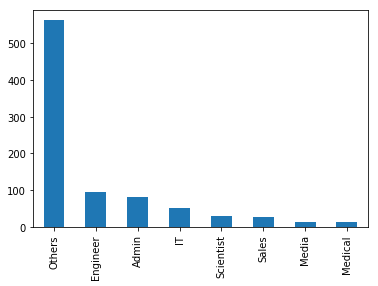

In [17]:
raw_data['Job Title'].value_counts().plot(kind = 'bar')

In [18]:
raw_data[['Job Title', 'Gender']]
raw_data.Gender.value_counts(normalize = True)

Male      0.847206
Female    0.152794
Name: Gender, dtype: float64

In [19]:
raw_data.groupby(['Gender'])['Experience', 'Salary'].median()

,Experience,Salary
Gender,,
Female,4,25960.0
Male,6,24000.0


In [20]:
raw_data.groupby(['Gender'])['Salary'].mean()

Gender
Female    23459.010000
Male      22139.619058
Name: Salary, dtype: float64

In [21]:
raw_data.groupby(['Experience','Gender', 'Job Title'])['Salary'].median()

Experience  Gender  Job Title
1           Female  Admin        26460.0
                    Engineer     22500.0
                    IT           30000.0
                    Media        30000.0
                    Others       20548.0
                    Sales        21500.0
                    Scientist    26100.0
            Male    Admin        27125.0
                    Engineer     24900.0
                    IT           21000.0
                    Media        20000.0
                    Medical      30000.0
                    Others       22000.0
                    Sales        20500.0
                    Scientist    27375.0
4           Female  Admin        27900.0
                    Engineer     24000.0
                    IT           27000.0
                    Media        30000.0
                    Medical      30000.0
                    Others       27000.0
                    Sales        30000.0
            Male    Admin        25250.0
                    Enginee

### Getting the mean of salaries based on each years of experience

In [22]:
dict = (raw_data.groupby(['Experience'])['Salary'].mean().astype(int)).to_dict()
print(dict)

{1: 21095, 4: 23560, 6: 21444, 8: 24046, 11: 21487, 22: 22547, 25: 23264, 30: 21121}


In [23]:
for k, v in dict.items():
    raw_data.loc[raw_data.Experience == k, "Salary"] = v
    
raw_data

C:\Users\simra\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Experience,Gender,Gender Encoded,Job Title,Job Title Encoded,Salary
0,1,Male,1,Engineer,1,21095.0
1,1,Male,1,Others,5,21095.0
2,1,Male,1,Others,5,21095.0
3,11,Male,1,Others,5,21487.0
4,1,Male,1,Others,5,21095.0
5,1,Male,1,Others,5,21095.0
6,4,Male,1,Engineer,1,23560.0
7,11,Male,1,Others,5,21487.0
8,6,Male,1,Others,5,21444.0
9,22,Male,1,Engineer,1,22547.0


### Removing Gender and Job Title column

In [24]:
raw_data.drop(['Gender'], axis = 1, inplace=True)
raw_data.drop(['Job Title'], axis = 1, inplace=True)
raw_data.head()

C:\Users\simra\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Experience,Gender Encoded,Job Title Encoded,Salary
0,1,1,1,21095.0
1,1,1,5,21095.0
2,1,1,5,21095.0
3,11,1,5,21487.0
4,1,1,5,21095.0


### Processed data path

In [25]:
processed_data_path = os.path.join(os.path.pardir, 'data', 'processed')
write_processed_data_path = os.path.join(processed_data_path, 'processed_data.xlsx')
raw_data.to_excel(write_processed_data_path, index=False)

### Read processed data to feed into the model

In [26]:
processed_data = pd.read_excel(write_processed_data_path)

In [27]:
processed_data

,Experience,Gender Encoded,Job Title Encoded,Salary
0,1,1,1,21095
1,1,1,5,21095
2,1,1,5,21095
3,11,1,5,21487
4,1,1,5,21095
5,1,1,5,21095
6,4,1,1,23560
7,11,1,5,21487
8,6,1,5,21444
9,22,1,1,22547


### Splitting the whole data into training and testing batches using train_test_split

In [28]:
train, test = train_test_split(processed_data, test_size = 0.2)
print("Training size: {}, Test Size {}".format(len(train), len(test)))

Training size: 701, Test Size 176


### Defining train and test data X and y features

In [29]:
features = ['Experience', 'Gender Encoded', 'Job Title Encoded']
X_train = train[features]
y_train = train['Salary']

X_test = test[features]
y_test = test['Salary'] 

### Creating the model

In [30]:
clf = RandomForestRegressor(n_estimators=100, random_state=0)

### Training the model using fit()

In [31]:
clf = clf.fit(X_train, y_train)

### Predict based on a new set of input variables

In [32]:
y_pred = clf.predict(X_test)

In [33]:
print(y_pred)
print(y_test)

[24046.   24046.   23560.   21095.   23560.   23560.   24046.   23560.
 23560.   21095.   21444.   21095.   21095.   21095.   21095.   21487.
 21487.   23560.   23264.   23264.   23560.   21444.   21487.   23560.
 23560.   21095.   21095.   21487.   23560.   21444.   21095.   24046.
 21095.   23560.   21444.   22547.   24046.   24046.   21487.   21095.
 21095.   21444.   22547.   24046.   21487.   21142.43 21095.   23560.
 24046.   24046.   23560.   23560.   24046.   21095.   21095.   21095.
 21444.   21444.   21444.   21095.   23560.   23264.   21095.   23560.
 23560.   21095.   21444.   21444.   23560.   23560.   21487.   21444.
 24046.   23560.   22547.   21487.   23560.   23560.   21487.   21095.
 22547.   24046.   21444.   21444.   21444.   24046.   21444.   23560.
 22547.   23560.   23560.   24046.   23560.   21095.   21095.   21487.
 23560.   21487.   21487.   21444.   21487.   23560.   21444.   23560.
 21095.   21095.   21444.   21487.   22547.   24046.   21095.   21095.
 23560

### Model Metrics: Errors

In [34]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.12176136363636529
Mean Squared Error: 2.6093460227273435
Root Mean Squared Error: 1.6153470285753906
